# Module 1: Is the hourglass model for gene expression really supported by the data?
### Paper to be examined: 
“A phylogenetically based transcriptome age index mirrors ontogenetic divergence patterns”, Nature 9;468(7325):815-8 (2010)[1]
### Key claim of the paper: 
"Gene expression follows the so-called hourglass pattern observed for morphological features of development, which are most similar to each other in the phylotypic stage in mid-development."

### Schedule:
* H1: General introduction to the paper/motivation
* H2-3: Write code to import the data and start computing transcriptome age index (TAI)
* H4-6: Aim to reproduce figure 1 of the paper – help/scripts will be given if needed.
* H7: Discussion: “Are you convinced of this result? What might have gone wrong?”
* H8: Redo analysis using log-transformed data
* H9: Summarize results (e.g. on this wiki)


### Key bioinformatics concept of this module: 
"Data normalization is important and can impact the results of subsequent analyses!"


# Installation and Setup

* Install the Anaconda distribution of Python 3.x.


# Libraries
Will be using [**GEOparse**](https://geoparse.readthedocs.io/en/latest/usage.html#working-with-geo-accession) for for fetching gene expression data and [**pandas**](https://pandas.pydata.org/pandas-docs/stable/10min.html) for data manipulation and preprocessing.

In [3]:
########### import necessary packages
import pandas as pd
import numpy as np
import GEOparse
import matplotlib.pyplot as plt

# Read gene expression data 


In [4]:
############# Download the data
file_name = 'GSE24616'
gse = GEOparse.get_GEO(geo=file_name, destdir="./")

06-Nov-2017 11:26:09 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE24nnn/GSE24616/soft/GSE24616_family.soft.gz to ./GSE24616_family.soft.gz
06-Nov-2017 11:26:09 INFO utils - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE24nnn/GSE24616/soft/GSE24616_family.soft.gz to ./GSE24616_family.soft.gz



06-Nov-2017 11:26:34 DEBUG GEOparse - SAMPLE: GSM606868
06-Nov-2017 11:26:35 DEBUG GEOparse - SAMPLE: GSM606869
06-Nov-2017 11:26:35 DEBUG GEOparse - SAMPLE: GSM606870
06-Nov-2017 11:26:35 DEBUG GEOparse - SAMPLE: GSM606871
06-Nov-2017 11:26:35 DEBUG GEOparse - SAMPLE: GSM606872
06-Nov-2017 11:26:35 DEBUG GEOparse - SAMPLE: GSM606873
06-Nov-2017 11:26:35 DEBUG GEOparse - SAMPLE: GSM606874
06-Nov-2017 11:26:35 DEBUG GEOparse - SAMPLE: GSM606875
06-Nov-2017 11:26:35 DEBUG GEOparse - SAMPLE: GSM606876
06-Nov-2017 11:26:36 DEBUG GEOparse - SAMPLE: GSM606877
06-Nov-2017 11:26:36 DEBUG GEOparse - SAMPLE: GSM606878
06-Nov-2017 11:26:36 DEBUG GEOparse - SAMPLE: GSM606879
06-Nov-2017 11:26:36 DEBUG GEOparse - SAMPLE: GSM606880
06-Nov-2017 11:26:36 DEBUG GEOparse - SAMPLE: GSM606881
06-Nov-2017 11:26:36 DEBUG GEOparse - SAMPLE: GSM606882
06-Nov-2017 11:26:36 DEBUG GEOparse - SAMPLE: GSM606883
06-Nov-2017 11:26:36 DEBUG GEOparse - SAMPLE: GSM606884
06-Nov-2017 11:26:37 DEBUG GEOparse - SAMPLE: GS

## GSE data structure:
Let's take a look at gene expression data stucture and accession.

**Data Sturcture:**
    - gse.gsms
        - gse.gsms.metadata
        - gse.gsms.name
        - gse.gsms.table
    - gse.gpl
        - gse.gpl.metadata
        - gse.gpl.name
        - gse.gpl.table
        
**GSE file name:** GSE24616

In [5]:
########### Explore an example of GSE content
print ("GSM example:")
for gsm_name, gsm in gse.gsms.items():
    print ("Name: ", gsm_name)
    print ('*'*100)
    print ("Metadata:"),
    for key, value in gsm.metadata.items():
        print(" - %s : %s" % (key, ", ".join(value)))
    print('*'*100)
    print ("Table data:"),
    print (gsm.table.head())
    break

GSM example:
Name:  GSM606866
****************************************************************************************************
Metadata:
 - title : egg_0min_mixed_rep1
 - geo_accession : GSM606866
 - status : Public on Dec 14 2010
 - submission_date : Oct 11 2010
 - last_update_date : Dec 14 2010
 - type : RNA
 - channel_count : 1
 - source_name_ch1 : unfertilised egg, 0min, mixed sex, replicate 1
 - organism_ch1 : Danio rerio
 - taxid_ch1 : 7955
 - characteristics_ch1 : strain: wild type, developmental stage: unfertilised egg, developmental timing: 0min, gender: mixed, number of individuals per sample: 50
 - treatment_protocol_ch1 : Staging was done according to post-fertilization time. Embryos were additionally staged under the dissecting microscope according to ref. 1 to check for the consistency of post-fertilization timing and morphological development at standard temperature (28.5 °C). Only healthy animals that showed the expected morphological features for a given post-ferti

In [6]:
print ("GPL example:")
for gpl_name, gpl in gse.gpls.items():
    print ("Name: ", gpl_name)
    print ('*'*100)
    print ("Metadata:"),
    for key, value in gpl.metadata.items():
        print (" - %s : %s" % (key, ", ".join(value)))
    print ('*'*100)
    print ("Table data:"),
    print (gpl.table.head())
    break


GPL example:
Name:  GPL6457
****************************************************************************************************
Metadata:
 - title : Agilent-019161 D. rerio (Zebrafish) Oligo Microarray (V2) G2519F (Feature Number version)
 - geo_accession : GPL6457
 - status : Public on Feb 05 2008
 - submission_date : Feb 05 2008
 - last_update_date : Dec 06 2012
 - technology : in situ oligonucleotide
 - distribution : custom-commercial
 - organism : Danio rerio
 - taxid : 7955
 - manufacturer : Agilent Technologies
 - manufacture_protocol : see manufacturer's web site at http://www.agilent.com/
 - catalog_number : G2519F
 - description : , Agilent has developed a genome-wide zebrafish microarray to enable scientists to study gene expression profiling at the global level and enhance our understanding of zebrafish biology and gene functions related to mammalian models., , Arrays of this design have barcodes that begin with 16019161 or 2519161., , Orientation:, Features are numbered n

# Read age index data file

# Pre processing gene expression data:
Gene expression data needs to be extracted from GSE data structure. Preprocessing steps are:
1. Extract the metadata
2. Extract the gene expression data
3. Add age index data to the gene expression data
4. Get average for the genes with multiple probesets
5. Select mixed and female samples 
6. Get the average gene expression for similar time points¶

## 1) Extract  metadata of samples in gene expression data
Complementary information about the samples is stores in  **gsm.metadata** including sex, developmental stage and the sample name. A sample metadata looks like:

"characteristics_ch1 : strain: wild type, developmental stage: adult, developmental timing: 1y9m, gender: mixed, number of individuals per sample: 2"

All these infomations are stored in an string and we need to extract them by some String Formatting Operations.

In [7]:
############### Extract GSE metadata
characteristics = {"stage":[],"time":[],"sex":[],"sample_name":[]}
for gsm_name, gsm in sorted(gse.gsms.items()): # gsm: metadata, columns, table
    characteristics["stage"].append(gsm.metadata['characteristics_ch1'][1].split(":")[1].strip())
    characteristics["time"].append(gsm.metadata['characteristics_ch1'][2].split(":")[1].strip())
    characteristics["sex"].append(gsm.metadata['characteristics_ch1'][3].split(":")[1].strip())
    characteristics["sample_name"].append(gsm_name)
char_df = pd.DataFrame(characteristics,index = characteristics["sample_name"])
char_df.head()

,sample_name,sex,stage,time
GSM606866,GSM606866,mixed,unfertilised egg,0min
GSM606867,GSM606867,mixed,unfertilised egg,0min
GSM606868,GSM606868,mixed,zygote,15min
GSM606869,GSM606869,mixed,zygote,15min
GSM606870,GSM606870,mixed,cleavage,45min


## 2) Extract the gene expression data

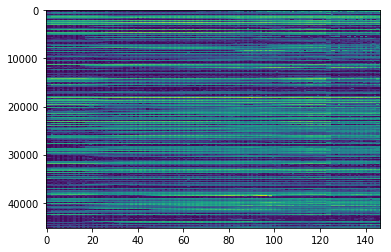

In [8]:
############### Extract the gene expression data
data = gse.pivot_samples('VALUE') 
############# Add ProbeID as the index of gene expression dataframe
gpl = list(gse.gpls.values())[0]
data.set_index(gpl.table.SPOT_ID,inplace=True)
############ Let's look at the gene expression data
data.head()
plt.imshow(np.log(data.values),aspect='auto')
plt.show()

## 3) Add age index data to the gene expression data

## 4) Get average for the genes with multiple probesets

## 5) Select mixed and female samples

## 6) Get the average gene expression for similar time points

# TAI Calculation

# Save the pre-processed expression data to a file